In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [25]:
df=pd.read_csv('dataset/CC GENERAL.csv')

# DATA INVESTIGATION

In [26]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [28]:
df.keys()

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [29]:
#SELECTING FEATURES
selected=df.drop("CUST_ID",axis=1).columns.tolist()
df=df.drop("CUST_ID",axis=1)

# DATA CLEANING

In [30]:
# MISSING VALUE
print(df.isna().sum())



BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [31]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df.dropna(inplace=True)

In [32]:
print(df.isna().sum())

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


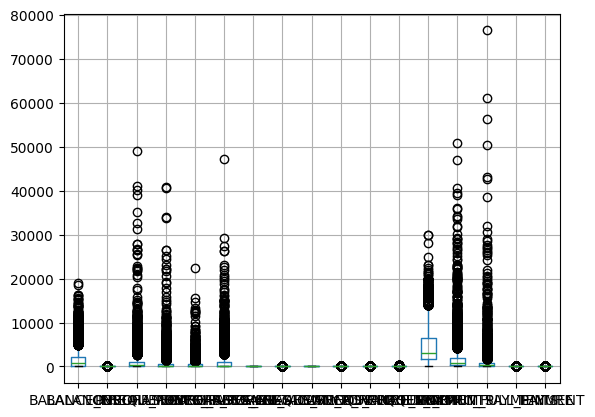

In [33]:
# OUTLIER not very sure need to clean because big spender
df.boxplot()
plt.show()

In [34]:
#Remove outlier

# for column in df.columns:
#     Q1 = np.percentile(df[column], 0)
#     Q3 = np.percentile(df[column], 75)
#     IQR = Q3 - Q1
#     lower_bound = np.min(df[column])
#     upper_bound = Q3 + (1.5 * IQR)
#     df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


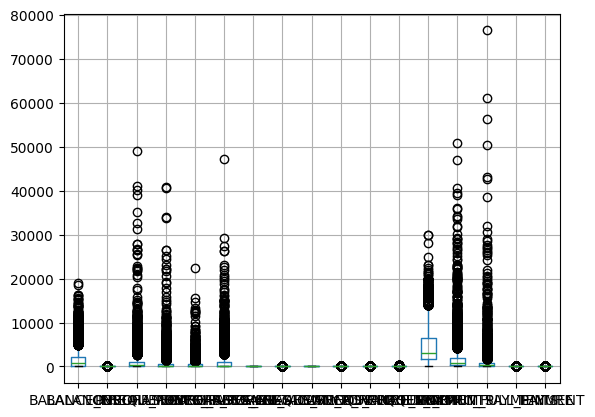

In [35]:
df.boxplot()
plt.show()

In [36]:
#Duplicate
print(df[df.duplicated()])

Empty DataFrame
Columns: [BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []


# DATA PREPROCESSED

In [37]:
scale=StandardScaler()
X=scale.fit_transform(df)

df_preprocessed=pd.DataFrame(data=X,columns=df.columns)
type(df_preprocessed)
df_preprocessed.shape

(8949, 17)

# CHECK CORR

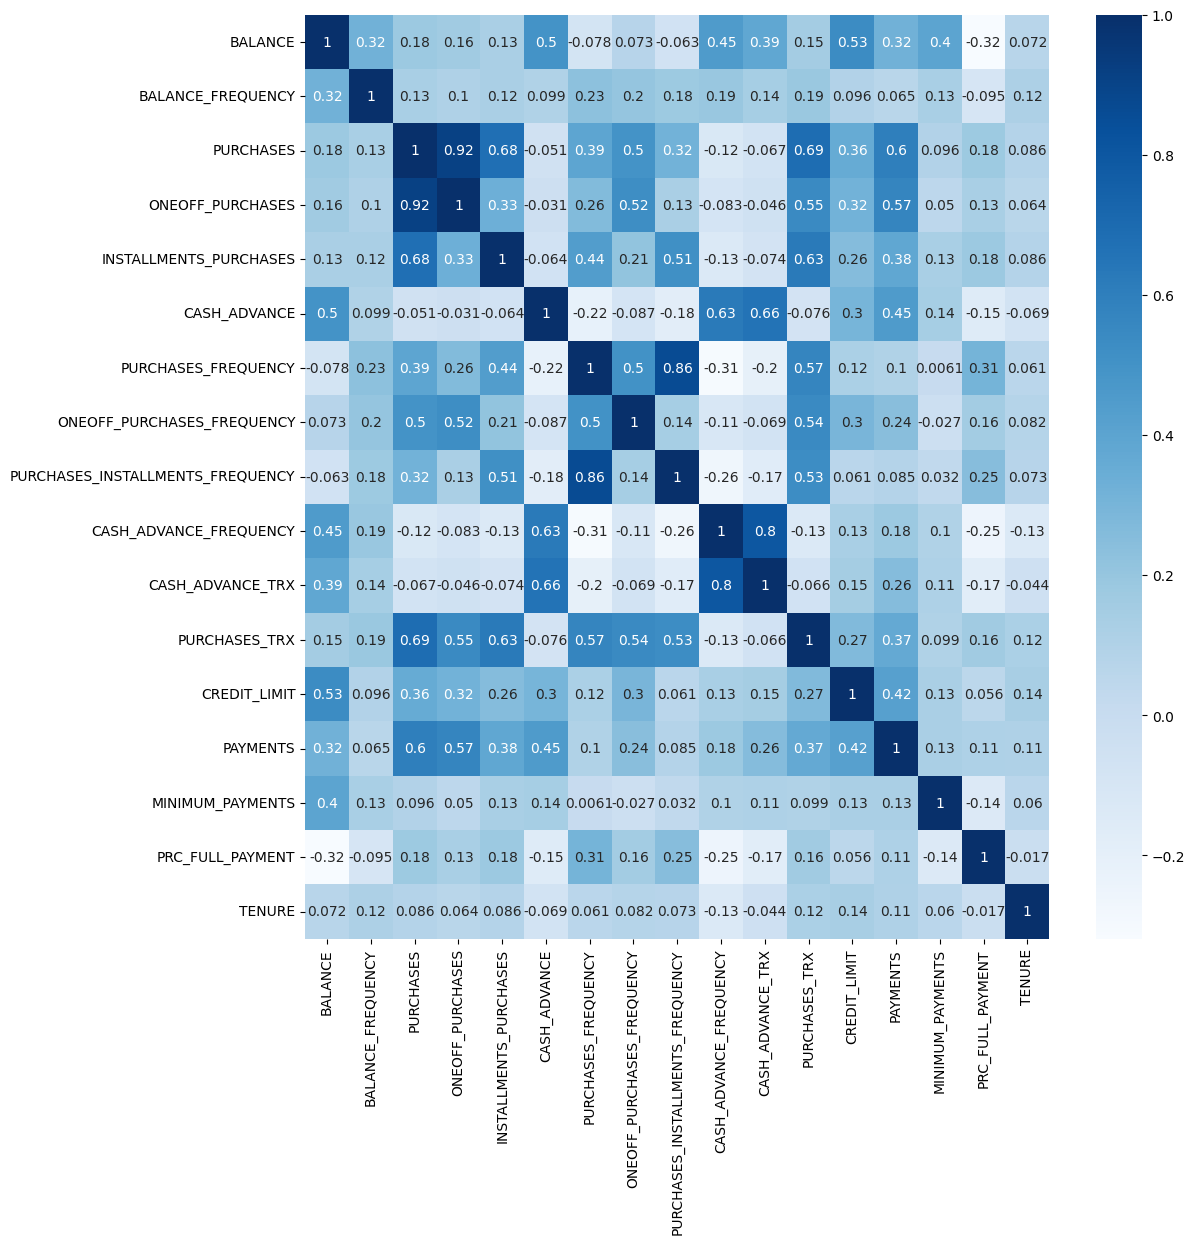

In [38]:
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), annot=True,cmap="Blues", 
            xticklabels=df.columns,
            yticklabels=df.columns)
plt.show()

# Dimension reduction


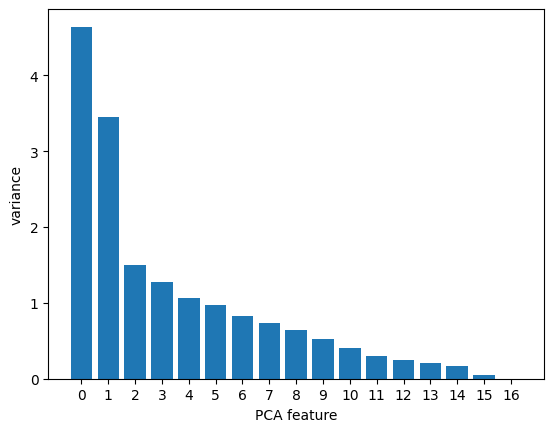

In [39]:
#PCA dimension reduction
pca = PCA()
pca.fit(df_preprocessed)

# Plot the explained variance
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [40]:
pca=PCA(n_components=2)
pca=pca.fit_transform(df_preprocessed)


# Kmeans

c:\Users\VP\anaconda3\envs\scrtm45\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\VP\anaconda3\envs\scrtm45\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\VP\anaconda3\envs\scrtm45\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\VP\anaconda3\envs\scrtm45\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

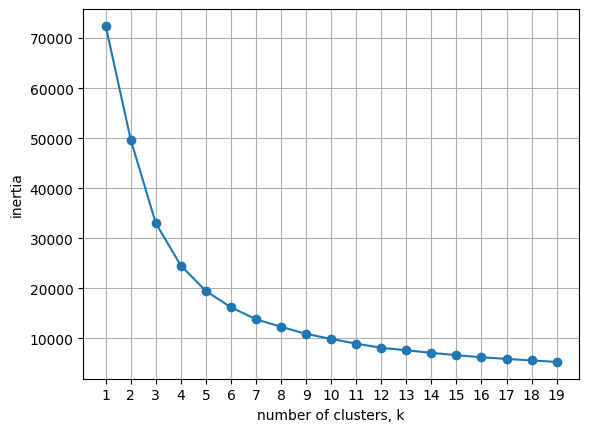

In [41]:
ks = range(1, 20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k,random_state=42)
    
    # Fit model to samples
    model.fit(pca)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.grid(True)
plt.show()

c:\Users\VP\anaconda3\envs\scrtm45\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


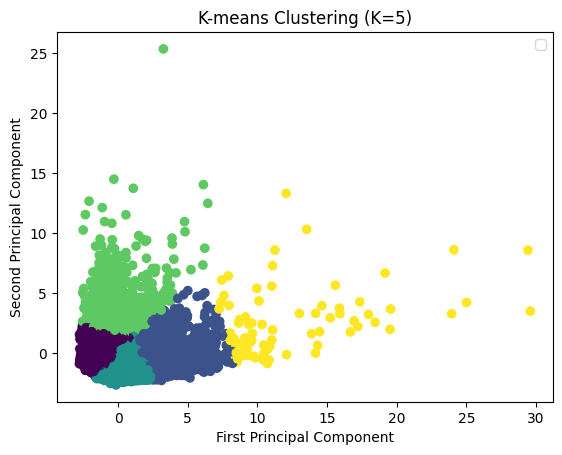

In [42]:
n_clusters=5
model=KMeans(n_clusters=n_clusters,random_state=42)
model.fit(pca)
label=model.predict(pca)

#Visual cluster
plt.scatter(pca[:, 0], pca[:, 1], c=label, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

In [43]:
df['label'] = label
selected.append('label')
stat = df[selected].groupby('label').mean()
stat


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
label,,,,,,,,,,,,,,,,,
0,1179.342918,0.820332,192.613602,148.538097,44.300554,768.185023,0.144310,0.069864,0.072386,0.149147,2.825852,2.340341,3185.823864,934.543273,610.916403,0.039276,11.353693
1,2253.218179,0.981451,3682.194513,2294.495292,1388.305458,490.012174,0.947668,0.645741,0.760811,0.071268,1.617934,52.872320,7665.204678,3603.562952,1224.368965,0.278983,11.924951
2,618.716964,0.874183,848.524309,384.466860,464.418581,103.615009,0.784297,0.214806,0.611629,0.023578,0.414867,15.623689,3613.394073,991.192587,480.776676,0.272649,11.582357
3,4749.541278,0.966269,474.084917,311.690018,162.488863,4740.570214,0.268961,0.134414,0.165014,0.487815,14.666359,6.797597,7768.396068,3733.877648,2139.160445,0.034827,11.440850
4,4988.080052,0.978021,15935.140759,10653.392911,5281.747848,1123.151942,0.944937,0.781128,0.821212,0.088608,3.227848,141.278481,12939.240506,16092.133471,3569.914672,0.375266,11.962025


# -----THE TARGET-----

# BIG SPENDER can be identified in cluster 4

In [44]:
df['label'] = label
stat = df[["PURCHASES","ONEOFF_PURCHASES",'CREDIT_LIMIT',"label"]].groupby('label').mean()
stat['count'] = df.groupby('label').size()
print(stat)

          PURCHASES  ONEOFF_PURCHASES  CREDIT_LIMIT  count
label                                                     
0        192.613602        148.538097   3185.823864   3520
1       3682.194513       2294.495292   7665.204678   1026
2        848.524309        384.466860   3613.394073   3242
3        474.084917        311.690018   7768.396068   1082
4      15935.140759      10653.392911  12939.240506     79


In [45]:
stat.keys()

Index(['PURCHASES', 'ONEOFF_PURCHASES', 'CREDIT_LIMIT', 'count'], dtype='object')

# MICROTRANSACTION LOVER can be identified in cluster 1

In [46]:
stat = df[["BALANCE_FREQUENCY","PURCHASES_FREQUENCY",'PURCHASES',"label"]].groupby('label').mean()
stat['count'] = df.groupby('label').size()
stat

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,PURCHASES,count
label,,,,
0,0.820332,0.144310,192.613602,3520
1,0.981451,0.947668,3682.194513,1026
2,0.874183,0.784297,848.524309,3242
3,0.966269,0.268961,474.084917,1082
4,0.978021,0.944937,15935.140759,79


"In the outlier analysis of this dataset, no outliers are removed due to the nature of the dataset, which comprises financial data where rich individuals are likely to be considered outliers, as indicated in the analysis below. As a data scientist aiming to conduct analysis, the primary target that needs to be chosen is the top priority customer group. Removing outliers, particularly the wealthy individuals in this context, isn't feasible.

Upon examination, the data reveals the presence of five distinct clusters within the customer dataset. However, among these clusters, only two can be identified as high-priority customer segments. Firstly, Cluster Number 4 stands out as the 'Big Spender,' essentially representing rich individuals or high-net-worth individuals. Analyzing their behavioral variables demonstrates that just small number (79/+-9k) outpace all other clusters in terms of purchases volume with just small number of them, earning them the moniker of 'The Whaler' or 'Leviathon,' denoting their substantial spending habits. This classification of outliers corresponds to the rich individuals within the dataset.

Secondly, we have Cluster 1, characterized by 'Microtransaction Lovers.' These individuals exhibit a tendency to make numerous small purchases but with a high frequency. Their behavior suggests either a propensity to spend liberally or poor financial management. As a data scientist, recognizing this behavior becomes crucial, as it often translates to a steady income due to their consistent spending habits, despite potential financial imprudence.

In summary, after concluding the dataset analysis, the identified priority customer segments are the 'Big Spenders' (rich individuals) within Cluster 4 and the 'Microtransaction Lovers' (frequent small spenders or individuals with poor financial habits) within Cluster 1."